In [1]:
import os
import numpy as np
import pandas as pd
#  import the geodesic module from the geopy library
from geopy.distance import geodesic as GD
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('network_bus.csv', sep = ';')
df

from_stop_I  to_stop_I    d  duration_avg  n_vehicles  \
0              72       1659  296          40.0          98   
1              73       5563  347          22.0          12   
2              73       3158  364          59.0         137   
3              75       8292  254          62.0          59   
4              76       3930  395          53.0          67   
...           ...        ...  ...           ...         ...   
9664         8342       7981  419         251.0         465   
9665         8342       7502  317          79.0         286   
9666         8343       7888  455         147.0          52   
9667         8344         97  396         104.0          68   
9668         8345       3541  318         105.0          73   

     route_I_counts,,,,,,,,,,,,,,  
0             49:69,,,,,,,,,,,,,,  
1            348:12,,,,,,,,,,,,,,  
2            218:82,,,,,,,,,,,,,,  
3            124:59,,,,,,,,,,,,,,  
4            171:67,,,,,,,,,,,,,,  
...                           ...  
9664        145:157,,,,,,,,,,,,,,  
9665         356:16,,,,,,,,,,,,,,  
9666         239:52,,,,,,,,,,,,,,  
9667         277:68,,,,,,,,,,,,,,  
9668         154:73,,,,,,,,,,,,,,  

[9669 rows x 6 columns]

In [3]:
# Create your dictionary class 
class my_dictionary(dict): 
  
    # __init__ function 
    def __init__(self): 
        self = dict() 
          
    # Function to add key:value 
    def add(self, key, value): 
        self[key] = value 

In [4]:
d1 = my_dictionary()

for i in range(len(df)):
    t = (df.iloc[i, 0], df.iloc[i, 1])
    l = [df.iloc[i, 2], df.iloc[i, 4]]
    d1.add(t, l)
    
print(d1)

{(72, 1659): [296, 98], (73, 5563): [347, 12], (73, 3158): [364, 137], (75, 8292): [254, 59], (76, 3930): [395, 67], (77, 3435): [349, 54], (79, 4708): [170, 70], (80, 6351): [255, 47], (81, 7475): [130, 47], (82, 117): [451, 478], (83, 84): [221, 188], (84, 1775): [309, 188], (85, 6810): [222, 38], (86, 5145): [458, 30], (87, 4695): [425, 68], (88, 6291): [350, 70], (89, 7289): [315, 49], (92, 5954): [190, 74], (93, 7587): [227, 74], (94, 3189): [186, 110], (95, 2559): [271, 111], (96, 7255): [3645, 42], (97, 3215): [321, 67], (98, 2410): [561, 44], (99, 2410): [545, 2], (100, 2864): [443, 75], (100, 3602): [484, 143], (101, 1167): [140, 91], (102, 1162): [402, 91], (103, 104): [432, 28], (104, 3497): [1879, 14], (104, 3444): [1231, 14], (105, 3361): [403, 316], (105, 1169): [409, 38], (106, 3319): [190, 358], (107, 1780): [241, 153], (108, 107): [139, 153], (109, 6089): [322, 72], (111, 2620): [599, 61], (111, 4853): [1816, 24], (112, 157): [114, 58], (113, 7004): [283, 98], (114, 39

In [5]:
nodes_df = pd.read_csv('network_nodes.csv', sep = ';')
nodes_df

stop_I        lat        lon           name
0          9  41.872362  12.484440  Roma Ostiense
1         10  42.006374  12.520168     Settebagni
2         16  42.002853  12.380691      La Storta
3         17  41.818408  12.344730  Ponte Galeria
4         18  41.809481  12.557676      Torricola
...      ...        ...        ...            ...
7864    8615  41.886115  12.562108       GARDENIE
7865    8616  41.889483  12.551361          TEANO
7866    8617  41.887325  12.540216      MALATESTA
7867    8618  41.888342  12.528663        PIGNETO
7868    8619  41.887055  12.518793           LODI

[7869 rows x 4 columns]

In [6]:
d2 = my_dictionary()

for i in range(len(nodes_df)):
    d2.add(nodes_df.iloc[i, 0], [nodes_df.iloc[i, 1], nodes_df.iloc[i, 2], nodes_df.iloc[i, 3]])
    
print(d2)

{9: [41.872362, 12.48444, 'Roma Ostiense'], 10: [42.006374, 12.520168, 'Settebagni'], 16: [42.002853, 12.380691, 'La Storta'], 17: [41.818408, 12.34473, 'Ponte Galeria'], 18: [41.809481, 12.557676, 'Torricola'], 19: [41.824775, 12.408648, 'Muratella'], 20: [41.847902, 12.455112, 'Villa Bonelli'], 21: [41.81002, 12.319127, 'Fiera di Roma'], 22: [42.01463, 12.363741, 'Olgiata'], 23: [41.872385, 12.466139, 'Roma Trastevere'], 24: [41.896065, 12.454467, 'Roma San Pietro'], 25: [41.911906, 12.438886, 'Appiano Proba Petronia'], 26: [41.927852, 12.427862, 'Gemelli'], 27: [41.799809, 12.296186, 'Parco Leonardo'], 28: [41.946703, 12.416304, 'Roma San Filippo Neri'], 30: [41.830764, 12.568833, 'Capannelle'], 31: [41.834296, 12.430979, 'Magliana'], 32: [41.979177, 12.508455, 'Fidene'], 33: [41.878598, 12.458787, 'Quattro Venti'], 34: [41.968752, 12.408857, 'Ipogeo degli Ottavi'], 35: [41.911082, 12.531088, 'Roma Tiburtina'], 37: [41.879237, 12.523672, 'Roma Tuscolana'], 38: [41.939064, 12.421741,

## Nodes Distibution

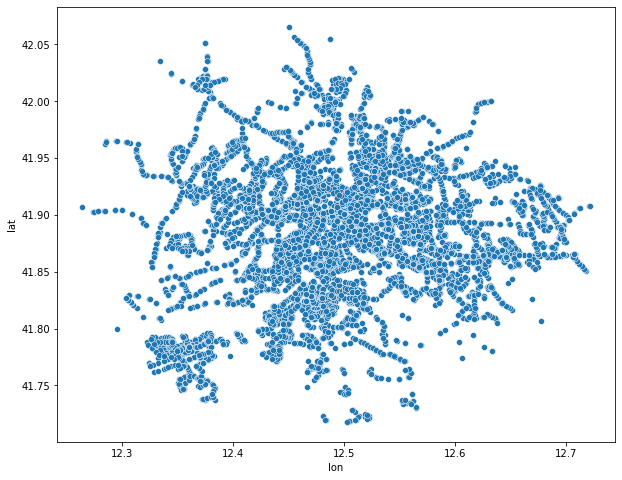

In [7]:
plt.figure(figsize = (10, 8))

ax = sns.scatterplot(x = nodes_df['lon'],
               y = nodes_df['lat'])
plt.xtitle = 'Longitude'
plt.ytitle = 'Latitude'
plt.title = 'Nodes Distribution'
plt.show()

In [8]:
import plotly.express as px

fig = px.scatter(data_frame = nodes_df, x = 'lon', y = 'lat', hover_data = ['name'], width = 1000, height = 800, size_max = 10, opacity = 0.5
                )
fig.update_traces(marker = dict(size = 10, color = 'lightskyblue', line = dict(width = 1, color = 'purple')))

fig.show()

### Generating User Data

In [9]:
def normal(A):

    N = np.shape(A)[0]
    M = np.zeros((N, np.shape(A)[1]))

    for i in range(N):
        M[i, :] = A[i, :] / np.sum(A[i, :])

    return M

In [10]:
def genLoc(p, N, M, I):
    L = []
    for i in range(p):

        if i == 0:
            # Select first location based on importance of location
            start = np.random.choice([i for i in range(N)], p = I, size = 1)
            L.append(nodes_df.iloc[start[0], 0])

        else:
            # Select next location based on normalized transition matrix
            last_location = L[-1]
            next = np.random.choice([i for i in range(N)], p = list(M[last_location, :]), size=1)
            next_node = nodes_df.iloc[next[0], 0]
            
            x = (d2[last_location][0], d2[last_location][1])
            y = (d2[next_node][0], d2[next_node][1])
            d = GD(x,y).miles
            
            if(d > 25) :
                i = i - 1
            
            else :
                L.append(next_node)
            
    return L

In [11]:
# Number of locations
N = len(nodes_df)

# Transition matrix
# A[i, j] = Number of trips from location i to location j (based on the number of trips in the dataset)
A = np.random.randint(5, size=(N, N))
print (A)

# Normalize matrix so that each row adds to 1.0
# The new transition matrix M[i, j] represents the probability of moving from location i to j
M = normal(A)
print (M)

# Importance of each location is the total number of trips starting at that zone
I = [np.sum(A[i, :]) + np.sum(A[:, i]) - A[i, i]  for i in range(N)]
I = [float(I[i]) / float(sum(I)) for i in range(N)]

[[0 4 2 ... 0 4 3]
 [0 1 1 ... 4 0 4]
 [0 3 1 ... 1 0 0]
 ...
 [1 0 2 ... 3 2 3]
 [4 4 3 ... 4 2 3]
 [4 2 3 ... 4 2 0]]
[[0.00000000e+00 2.52604989e-04 1.26302494e-04 ... 0.00000000e+00
  2.52604989e-04 1.89453742e-04]
 [0.00000000e+00 6.31751848e-05 6.31751848e-05 ... 2.52700739e-04
  0.00000000e+00 2.52700739e-04]
 [0.00000000e+00 1.90936864e-04 6.36456212e-05 ... 6.36456212e-05
  0.00000000e+00 0.00000000e+00]
 ...
 [6.28614534e-05 0.00000000e+00 1.25722907e-04 ... 1.88584360e-04
  1.25722907e-04 1.88584360e-04]
 [2.55232261e-04 2.55232261e-04 1.91424196e-04 ... 2.55232261e-04
  1.27616131e-04 1.91424196e-04]
 [2.58682015e-04 1.29341008e-04 1.94011511e-04 ... 2.58682015e-04
  1.29341008e-04 0.00000000e+00]]
[0.00012751252204706327, 0.00012743175913605394, 0.00012688660948674104, 0.00012800921394977058, 0.00012778711594449495, 0.0001267250836647224, 0.00012762155197692585, 0.00012853013472578068, 0.00012739541582609975, 0.00012668470220921773, 0.00012819496864509202, 0.00012769827674

In [12]:
# # # Maximum periodicity
# # P = 5

# # # Generate the periodicity of each user
# # p = np.random.randint(2, P)
# # print('p', p)

# p = 3

# L = []
# for i in range(p):

#     if i == 0:
#         # Select first location based on importance of location
#         start = np.random.choice([i for i in range(N)], p = I, size = 1)
#         L.append(start[0])

#     else:
#         # Select next location based on normalized transition matrix
#         last_location = L[-1]
#         next = np.random.choice([i for i in range(N)], p = list(M[last_location, :]), size=1)
#         L.append(next[0])

# print (L)

In [13]:
p = 3

user_data = []

for i in range(3):
    L = genLoc(p, N, M, I)
    user_data.append(L)
    p = p + 1
    
print(user_data)

[[3131, 1780, 7875], [4834, 2781, 2773, 666], [312, 6035, 1506, 7603, 2486]]


In [14]:
X = []
Y = []
H = []

for i in range(3):
    x = []
    y = []
    h = []
    for j in range(len(user_data[i])):
        key = user_data[i][j]
        x.append(d2[key][1])
        y.append(d2[key][0])
        h.append(d2[key][2])
        
    x.append(x[0])
    y.append(y[0])
    h.append(h[0])
    X.append(x)
    Y.append(y)
    H.append(h)
    
print(X)
print(Y)
print(H)

[[12.430107, 12.614878, 12.603816, 12.430107], [12.450236, 12.397074, 12.402338, 12.511891, 12.450236], [12.482804, 12.374227, 12.445279, 12.385793, 12.479209, 12.482804]]
[[41.946881, 41.936363, 41.811785, 41.946881], [41.908621, 41.958452, 41.955919, 41.879137, 41.908621], [41.913334, 41.786197, 41.87634, 41.953583, 41.823966, 41.913334]]
[['BENEDETTINE/PROFILIO', 'TIBURTINA/CASALE BONANNI', 'VIGNE DI MORENA/SETTE METRI', 'BENEDETTINE/PROFILIO'], ['DI LAURIA', 'FIORI C./LANDUCCI TOSI', 'PANIZZI/CASAL DEL MARMO', 'ETRURIA/ALBALONGA', 'DI LAURIA'], ['VICTOR HUGO/MUSEO BILOTTI', 'LANDI FABIANO/SEREGNO', 'ZAMBARELLI/GIANICOLENSE', 'LEZZENO/CIVICO 126', 'LAURENTINA/LORENZONI', 'VICTOR HUGO/MUSEO BILOTTI']]


In [15]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x = X[0], y = Y[0], mode = 'lines + markers', name = 'User 0', text = H[0]))
fig.add_trace(go.Scatter(x = X[1], y = Y[1], mode = 'lines + markers', name = 'User 1', text = H[1]))
fig.add_trace(go.Scatter(x = X[2], y = Y[2], mode = 'lines + markers', name = 'User 2', text = H[2]))

fig.update_layout(
    title="User with Different Periodicity",
    xaxis_title="Longitude",
    yaxis_title="Latitude",
    legend_title="Users",
)

fig.show()